In [1]:
# @title Imports
import numpy as np
import random
from tqdm import tqdm
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import glob
from os import listdir
from sklearn.model_selection import train_test_split
import keras.utils as image

In [ ]:
# @title Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title Path to the directory containing images

import PIL.Image
import os

# Path to the main directory containing subdirectories
main_directory = "/content/drive/MyDrive/cancer images"

# Initialize lists to store data
file_paths = []
targets = []

# Iterate over subdirectories "0" and "1"
for subfolder in ["0", "1"]:
    subfolder_path = os.path.join(main_directory, subfolder)
    # Check if the subfolder exists
    if os.path.isdir(subfolder_path):
        # Iterate over files in the subfolder
        for filename in os.listdir(subfolder_path):
            # Check if the file is an image
            if filename.endswith(".jpg") or filename.endswith(".png"):
                # Construct the file path
                file_path = os.path.join(subfolder_path, filename)
                # Append file path to the list
                file_paths.append(file_path)
                # Append the target (subfolder name) to the list
                targets.append(subfolder)

# Total number of images
total_images = len(file_paths)

# Create a pandas DataFrame
df = pd.DataFrame(index=np.arange(total_images), columns=["id", "path", "target"])

# Assign values to DataFrame columns
df["id"] = np.arange(total_images)
df["path"] = file_paths
df["target"] = targets

# Display the DataFrame
print(df)

      id                                               path target
0      0  /content/drive/MyDrive/cancer images/0/8863_id...      0
1      1  /content/drive/MyDrive/cancer images/0/8863_id...      0
2      2  /content/drive/MyDrive/cancer images/0/8863_id...      0
3      3  /content/drive/MyDrive/cancer images/0/8863_id...      0
4      4  /content/drive/MyDrive/cancer images/0/8863_id...      0
..   ...                                                ...    ...
974  974  /content/drive/MyDrive/cancer images/1/8863_id...      1
975  975  /content/drive/MyDrive/cancer images/1/8863_id...      1
976  976  /content/drive/MyDrive/cancer images/1/8863_id...      1
977  977  /content/drive/MyDrive/cancer images/1/8863_id...      1
978  978  /content/drive/MyDrive/cancer images/1/8863_id...      1

[979 rows x 3 columns]


In [ ]:
# @title Printing the Number of Elements in Each 0 and 1 folder
# Path to the main directory containing subdirectories
main_directory = "/content/drive/MyDrive/cancer images"

# Initialize variables to store counts
num_items_folder_0 = 0
num_items_folder_1 = 0

# Iterate over subdirectories "0" and "1"
for subfolder in ["0", "1"]:
    subfolder_path = os.path.join(main_directory, subfolder)
    # Check if the subfolder exists
    if os.path.isdir(subfolder_path):
        # Increment the count based on the number of items in the subfolder
        if subfolder == "0":
            num_items_folder_0 += len(os.listdir(subfolder_path))
        elif subfolder == "1":
            num_items_folder_1 += len(os.listdir(subfolder_path))

print("Number of items in folder 0:", num_items_folder_0)
print("Number of items in folder 1:", num_items_folder_1)

Number of items in folder 0: 772
Number of items in folder 1: 207


label 0: 78.86, label 1: 21.14


<ipython-input-5-76fe6d7f0b35>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=a["count"], y=a["target"], palette=colors)
<ipython-input-5-76fe6d7f0b35>:8: UserWarning: The palette list has more values (8) than needed (2), which may not be intended.
  sns.barplot(x=a["count"], y=a["target"], palette=colors)


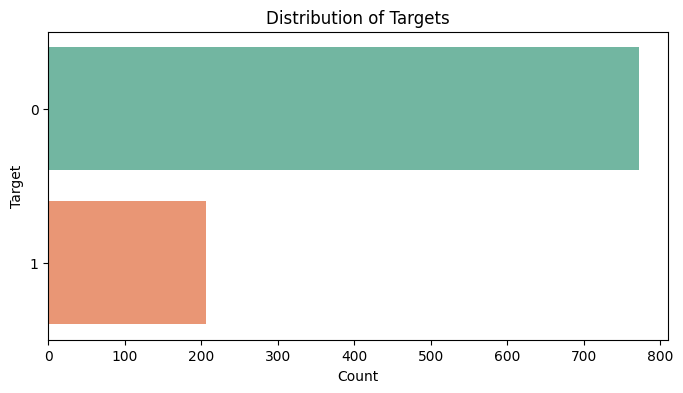

In [ ]:
# @title  Create the bar plot
a = df.target.value_counts().reset_index()
print(f"label 0: {round(sum(df['target'] == '0') / len(df) * 100, 2)}, label 1: {round(sum(df['target'] == '1') / len(df) * 100, 2)}")
colors = sns.color_palette("Set2")

# plotting it
plt.figure(figsize=(8, 4))
sns.barplot(x=a["count"], y=a["target"], palette=colors)
plt.xlabel("Count")
plt.ylabel("Target")
plt.title("Distribution of Targets")
plt.show()

In [ ]:
df.target = df.target.astype('int')

p = df[df['target']== 1]
pos_path =np.random.choice(p['path'], size=10)

n = df[df['target']== 0]
neg_path =np.random.choice(n['path'], size=10)

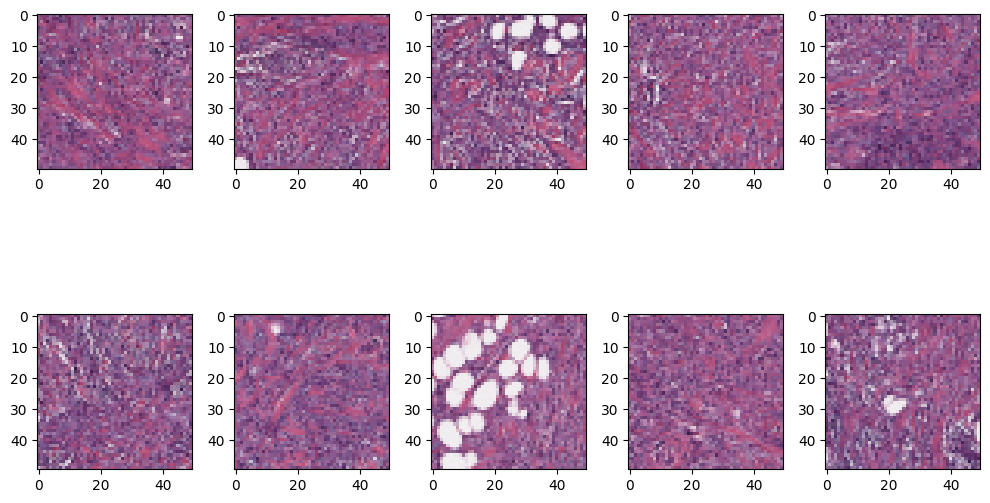

In [ ]:
f, ax = plt.subplots(2,5, figsize=(10,7))
ax = ax.flatten()
for i, image_path in enumerate(pos_path):
    img = plt.imread(image_path)
    ax[i].imshow(img)
plt.tight_layout()
plt.show()

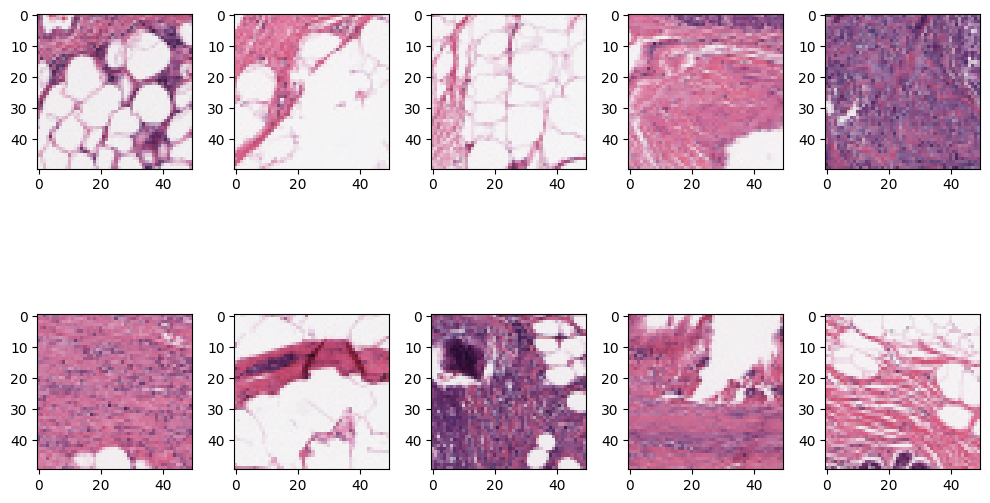

In [ ]:
f, ax = plt.subplots(2,5, figsize=(10,7))
ax = ax.flatten()
for i, image_path in enumerate(neg_path):
    img = plt.imread(image_path)
    ax[i].imshow(img)
plt.tight_layout()
plt.show()

In [ ]:
# @title Validation strategy
df['target'] = df.target.astype('str')
patients = df.id.unique()

train_ids, sub_test_ids = train_test_split(patients,
                                           test_size=0.25,
                                           random_state=0)
test_ids, dev_ids = train_test_split(sub_test_ids, test_size=0.5, random_state=0)


print(f'train: {len(train_ids)/patients.shape[0]*100}, val: {len(dev_ids)/patients.shape[0]*100}, test: {len(test_ids)/patients.shape[0]*100}')

train: 74.97446373850867, val: 12.563840653728295, test: 12.461695607763023


In [ ]:
train_df = df.loc[df.id.isin(train_ids),:].copy()
test_df = df.loc[df.id.isin(test_ids),:].copy()
dev_df = df.loc[df.id.isin(dev_ids),:].copy()

train_df['target'] = train_df['target'].astype("float16")
test_df['target'] = test_df['target'].astype("float16")
dev_df['target']  = dev_df['target'].astype('float16')

In [ ]:
def resize(img):
    size = 50
    img = tf.image.resize(img, [size,size])
    img /= 255.
    return img

def augment_image(img):
    img = tf.image.random_flip_left_right(img)
    img = tf.image.random_flip_up_down(img)
    img = tf.image.random_brightness(img, max_delta=0.1)
    img = tf.image.random_contrast(img, lower=0.9, upper=1.1)
    img = tf.image.random_hue(img, max_delta=0.05)
    img = tf.image.random_saturation(img, lower=0.9, upper=1.1)

    # Simulate blur using Gaussian filter
    #img = tf.image.random_brightness(img, 0.3)
    #img = tf.image.random_saturation(img, 0.6, 1.6)
    #img = tf.image.random_contrast(img, 0.7, 1.3)
    #img = tf.image.random_hue(img, 0.05)
    # Add noise
    #img += tf.random.normal(tf.shape(img), mean=0.0, stddev=0.1)

    return img

def load_and_preprocess_image(path,label,type_data):
    image = tf.io.read_file(path)
    # Decode the image
    if tf.strings.regex_full_match(path, r".*\.png$"):
        image = tf.image.decode_png(image, channels=3)
    else:
        # Assuming JPEG if not PNG
        image = tf.image.decode_jpeg(image, channels=3)
    # Apply data augmentation
    if type_data == 'train':
        # Preprocess the image
        image = resize(image)
        image = augment_image(image)
    else:
        image = resize(image)
    return image, label

In [ ]:
# @title Training dataset
train_paths = train_df['path'].values
train_labels = train_df['target'].values.astype(np.float16)  # Convert labels to tf.float16
train_df = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
train_df = train_df.map(lambda x, y: load_and_preprocess_image(x, y, 'train'), num_parallel_calls=tf.data.AUTOTUNE)
train_df = train_df.shuffle(buffer_size=len(train_paths)).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Validation dataset
val_paths = dev_df['path'].values
val_labels = dev_df['target'].values.astype(np.float16)  # Convert labels to tf.float16
dev_df = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
dev_df = dev_df.map(lambda x, y: load_and_preprocess_image(x, y, 'val'), num_parallel_calls=tf.data.AUTOTUNE)
dev_df = dev_df.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Testing dataset
test_paths = test_df['path'].values
test_labels = test_df['target'].values.astype(np.float16)  # Convert labels to tf.float16
test_df = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))
test_df = test_df.map(lambda x, y: load_and_preprocess_image(x, y, 'test'), num_parallel_calls=tf.data.AUTOTUNE)
test_df = test_df.batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
train = df.loc[df.id.isin(train_ids), :].copy()
train_paths = train['path'].values
train_labels = train['target'].values
tr = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
tr = tr.map(lambda x, y: load_and_preprocess_image(x, y, 'train'), num_parallel_calls=tf.data.AUTOTUNE)

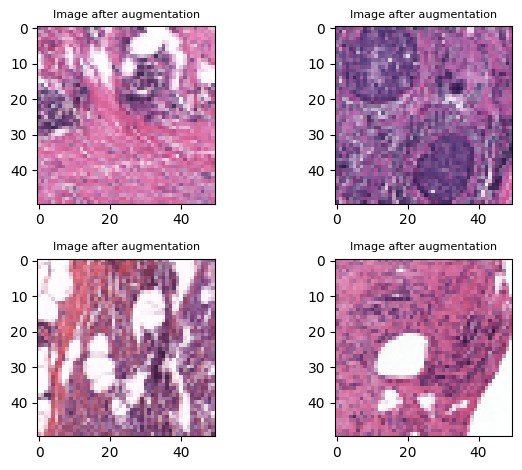

In [ ]:
images = []
for img, label in tr.take(4):
    images.append(img)

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i])
    plt.title('Image after augmentation', size=8)

plt.tight_layout()

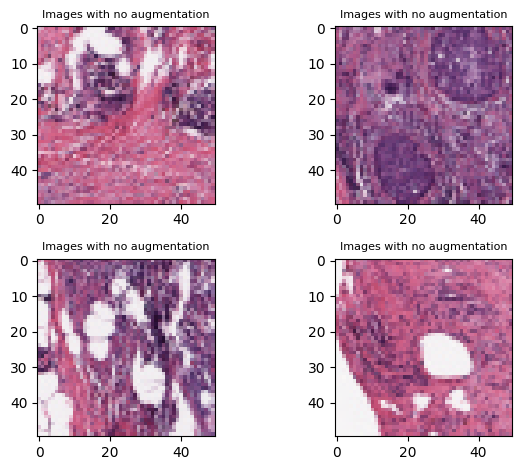

In [ ]:
train_paths = train['path'].values
train_labels = train['target'].values
ta = tf.data.Dataset.from_tensor_slices((train_paths, train_labels))
ta = ta.map(lambda x, y: load_and_preprocess_image(x, y, 'None'), num_parallel_calls=tf.data.AUTOTUNE)



images_no_aug = []
for img, label in ta.take(4):
    images_no_aug.append(img)

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images_no_aug[i])
    plt.title('Images with no augmentation', size=8)

plt.tight_layout()

In [ ]:
# @title Building the CNN

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Dense, Layer,Conv2D, MaxPooling2D, Flatten, Input, BatchNormalization
from tensorflow.keras.activations import linear, relu, sigmoid
from keras.optimizers import Adam
from keras.callbacks import Callback
from keras.models import save_model
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
class SaveModelOnImprovement(Callback):
    def __init__(self, filepath, monitor='val_accuracy', verbose=1, save_best_only=True):
        super(SaveModelOnImprovement, self).__init__()
        self.filepath = filepath
        self.monitor = monitor
        self.verbose = verbose
        self.save_best_only = save_best_only
        self.best_val_acc = -float('inf')

    def on_epoch_end(self, epoch, logs=None):
        current_val_acc = logs.get(self.monitor)
        if current_val_acc > self.best_val_acc:
            if self.verbose > 0:
                print(f"\nValidation accuracy improved from {self.best_val_acc:.5f} to {current_val_acc:.5f}. Saving model.")
            self.best_val_acc = current_val_acc
            save_model(self.model, self.filepath, overwrite=True)
        else:
            if self.verbose > 0:
                print(f"\nValidation accuracy did not improve from {self.best_val_acc:.5f}.")

callbacks  = [SaveModelOnImprovement(filepath='best_model.h5')]

In [ ]:
class FeatureExtractor(Layer):
    def __init__(self, filters1, filters2, filters3, filters4, filters5, kernel_size, activation, pool_size):
        super(FeatureExtractor, self).__init__()
        self.convd1 = Conv2D(filters=filters1, kernel_size=kernel_size, activation=activation)
        self.batch1 = BatchNormalization()

        self.convd2 = Conv2D(filters=filters2, kernel_size=kernel_size, activation=activation)
        self.batch2 = BatchNormalization()
        self.pool2 = MaxPooling2D(pool_size)
        self.dropout1 = Dropout(0.3)

        self.convd3 = Conv2D(filters=filters3, kernel_size=kernel_size, activation=activation)
        self.batch3 = BatchNormalization()

        self.convd4 = Conv2D(filters=filters4, kernel_size=kernel_size, activation=activation)
        self.batch4 = BatchNormalization()
        self.pool4 = MaxPooling2D(pool_size)
        self.dropout2 = Dropout(0.3)

        self.convd5 = Conv2D(filters=filters5, kernel_size=kernel_size, activation=activation)
        self.batch5 = BatchNormalization()
        self.pool5 = MaxPooling2D(pool_size)

    def call(self, x):
        x = self.convd1(x)
        x = self.batch1(x)
        x = self.dropout1(x)

        x = self.convd2(x)
        x = self.batch2(x)
        x = self.pool2(x)

        x = self.convd3(x)
        x = self.batch3(x)

        x = self.convd4(x)
        x = self.batch4(x)
        x = self.pool4(x)
        x = self.dropout2(x)

        x = self.convd5(x)
        x = self.batch5(x)

        return x

feature_sub_classes = FeatureExtractor(32,64, 64,128,256,3, 'relu', 2)

In [ ]:
# @title Activation function layers

input = Input(shape=(50, 50, 3), name="input")
x = feature_sub_classes(input)

x = Flatten()(x)

x = Dense(1000, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

output = Dense(1, activation='sigmoid')(x)

class_model = Model(inputs=input, outputs=output, name='baseline_model')

class_model.summary()

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 50, 50, 3)]       0         
                                                                 
 feature_extractor (Feature  (None, 7, 7, 256)         427520    
 Extractor)                                                      
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 1000)              12545000  
                                                                 
 batch_normalization_5 (Bat  (None, 1000)              4000      
 chNormalization)                                                
                                                                 
 dropout_2 (Dropout)         (None, 1000)           

In [ ]:
"""
Learning rate cycical
import math
class CyclicLR(Callback):
    def __init__(self, base_lr=1e-6, max_lr=0.1, step_size=2000, mode='triangular', gamma=1.):
        super(CyclicLR, self).__init__()
        self.base_lr = base_lr
        self.max_lr = max_lr
        self.step_size = step_size
        self.mode = mode
        self.gamma = gamma
        self.cycle = 0

    def on_train_batch_begin(self, batch, logs=None):
        self.cycle = math.floor(1 + batch / (2 * self.step_size))
        x = abs(batch / self.step_size - 2 * self.cycle + 1)
        if self.mode == 'triangular':
            lr = self.base_lr + (self.max_lr - self.base_lr) * max(0, 1 - x)
        elif self.mode == 'triangular2':
            lr = self.base_lr + (self.max_lr - self.base_lr) * max(0, 1 - x) / (2 ** (self.cycle - 1))
        elif self.mode == 'exp_range':
            lr = self.base_lr + (self.max_lr - self.base_lr) * max(0, 1 - x) * (self.gamma ** batch)
        else:
            raise ValueError('Invalid mode:', self.mode)

        tf.keras.backend.set_value(self.model.optimizer.lr, lr)

# Usage
start_lr = 1e-6
end_lr = 0.1
num_batches = len(train_df) // 32  # Assuming batch_size is defined
step_size = 2 * num_batches  # Two epochs per cycle
clr_callback = CyclicLR(base_lr=start_lr, max_lr=end_lr, step_size=step_size, mode='triangular2')
    """

"\nLearning rate cycical\nimport math\nclass CyclicLR(Callback):\n    def __init__(self, base_lr=1e-6, max_lr=0.1, step_size=2000, mode='triangular', gamma=1.):\n        super(CyclicLR, self).__init__()\n        self.base_lr = base_lr\n        self.max_lr = max_lr\n        self.step_size = step_size\n        self.mode = mode\n        self.gamma = gamma\n        self.cycle = 0\n\n    def on_train_batch_begin(self, batch, logs=None):\n        self.cycle = math.floor(1 + batch / (2 * self.step_size))\n        x = abs(batch / self.step_size - 2 * self.cycle + 1)\n        if self.mode == 'triangular':\n            lr = self.base_lr + (self.max_lr - self.base_lr) * max(0, 1 - x)\n        elif self.mode == 'triangular2':\n            lr = self.base_lr + (self.max_lr - self.base_lr) * max(0, 1 - x) / (2 ** (self.cycle - 1))\n        elif self.mode == 'exp_range':\n            lr = self.base_lr + (self.max_lr - self.base_lr) * max(0, 1 - x) * (self.gamma ** batch)\n        else:\n            ra

In [ ]:
print(train_df.element_spec)

(TensorSpec(shape=(None, 50, 50, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float16, name=None))


In [ ]:
# @title Assuming `class_model` is your model
input_shape = class_model.layers[0].input_shape

# Print the input shape
print("Model Input Shape:", input_shape)

Model Input Shape: [(None, 50, 50, 3)]


In [ ]:
# @title Assuming `train_df`, `dev_df`, `test_df` are your datasets
print("Train Dataset Element Spec:", train_df.element_spec)
print("Validation Dataset Element Spec:", dev_df.element_spec)
print("Test Dataset Element Spec:", test_df.element_spec)

Train Dataset Element Spec: (TensorSpec(shape=(None, 50, 50, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float16, name=None))
Validation Dataset Element Spec: (TensorSpec(shape=(None, 50, 50, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float16, name=None))
Test Dataset Element Spec: (TensorSpec(shape=(None, 50, 50, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.float16, name=None))


In [ ]:
# @title Running 20 Epochs and Cost Function
class_model.compile(loss=tf.keras.losses.BinaryCrossentropy(), # cost function
             metrics=['accuracy'],
             optimizer = Adam(learning_rate=0.0001))

class_model_hst = class_model.fit(train_df,
                 epochs=200,
                 validation_data=dev_df,
                 callbacks = [callbacks])

Epoch 1/200
23/23 [==============================] - ETA: 0s - loss: 0.7601 - accuracy: 0.6281
Validation accuracy improved from -inf to 0.21138. Saving model.


<ipython-input-17-3d0efa458fd2>:16: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  save_model(self.model, self.filepath, overwrite=True)


23/23 [==============================] - 22s 612ms/step - loss: 0.7601 - accuracy: 0.6281 - val_loss: 0.7894 - val_accuracy: 0.2114
Epoch 2/200
23/23 [==============================] - ETA: 0s - loss: 0.7203 - accuracy: 0.6635
Validation accuracy did not improve from 0.21138.
23/23 [==============================] - 15s 553ms/step - loss: 0.7203 - accuracy: 0.6635 - val_loss: 1.1750 - val_accuracy: 0.2114
Epoch 3/200
23/23 [==============================] - ETA: 0s - loss: 0.7147 - accuracy: 0.6649
Validation accuracy did not improve from 0.21138.
23/23 [==============================] - 15s 565ms/step - loss: 0.7147 - accuracy: 0.6649 - val_loss: 0.8759 - val_accuracy: 0.2114
Epoch 4/200
23/23 [==============================] - ETA: 0s - loss: 0.6848 - accuracy: 0.6839
Validation accuracy did not improve from 0.21138.
23/23 [==============================] - 15s 566ms/step - loss: 0.6848 - accuracy: 0.6839 - val_loss: 1.0762 - val_accuracy: 0.2114
Epoch 5/200
23/23 [==================

In [ ]:
0# @title Printing the current working directory
callbacks = [SaveModelOnImprovement(filepath='best_model.h5')]
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)

In [ ]:
# @title Extracting the saved 'best model'
# from the directory that callbacks saved it to
custom_objects = {'FeatureExtractor': FeatureExtractor}
model_ = load_model('/content/best_model.h5',custom_objects=custom_objects)

In [ ]:
# @title Prediction Evaluate
def load_prep(image_path, img_shape):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, size = [img_shape, img_shape])
    img /= 255.
    return img

# you can change the num_samples up to 6 random images
def pred_and_plot(df, num_samples):
    num_rows = (num_samples + 1) // 3
    num_cols = min(num_samples, 3)

    path_rand = np.random.choice(len(df), num_samples, replace=False)

    random_paths = df['path'].iloc[path_rand].tolist()
    random_labels = df['target'].iloc[path_rand].tolist()

    f, ax = plt.subplots(num_rows, num_cols, figsize=(10, 7))
    ax = ax.flatten()

    for i, (image_path, true_label) in enumerate(zip(random_paths, random_labels)):
        img = load_prep(image_path, 50)
        preds = model_.predict(tf.expand_dims(img, axis=0))
        ax[i].imshow(img)
        pred_label = 1 if preds > 0.5 else 0
        ax[i].set_title(f"Prediction: {pred_label} | True Label: {true_label}")

    for j in range(num_samples, num_rows * num_cols):
        ax[j].axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
test_pred = df.loc[df.id.isin(test_ids),:].copy()
pred_and_plot(test_pred, 6)

In [ ]:
class_model.evaluate(test_df)

In [ ]:
model_.evaluate(test_df)

In [ ]:
y_preds = model_.predict(test_df)

In [ ]:
binary_preds = (y_preds >= 0.5).astype(int)
test_pred.drop('path', axis=1,inplace=True)
test_pred.rename({"target":"label"})
test_pred['predicted'] = binary_preds
test_pred['proba'] = y_preds.round(6)

test_pred['target'] = test_pred['target'].astype('int')

In [ ]:
conf_matrix = confusion_matrix(test_pred.target, test_pred.predicted)
cls_report = classification_report(test_pred.target, test_pred.predicted)
print(cls_report)

In [ ]:
sns.heatmap(conf_matrix,annot=True, fmt='d', cmap='Reds')
plt.show()

In [ ]:
test_pred.head()

In [ ]:
# @title Plotting the Loss and Accuracy
# Access the history of training
history = class_model_hst.history

# Plot training & validation loss values
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation accuracy values
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
# @title Probability

from matplotlib import pyplot as plt
test_pred['proba'].plot(kind='hist', bins=20, title='probability')
plt.gca().spines[['top', 'right',]].set_visible(False)